<a href="https://colab.research.google.com/github/stanley568598/Github-Colab/blob/main/Project%201%EF%BC%9ACaptcha%20Code%20(CNN)/CNN_(captcha_code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN_(captcha_code).ipynb

> Original file is located at：https://colab.research.google.com/drive/1oGrs1yX4dUr7zFYTSZebuSQ_DX31K8_7

In [1]:
# Colab VM 連接到 Google Drive
#  把雲端硬碟的空間 mount 到 content 之下

from google.colab import drive
drive.mount('/content/drive')

# • 執行後會產生一個URL，必須打開
# • 登入Google帳號-> 允許->產生授權碼
# • 回到Colab上貼上授權碼
# • 如此就可以讓 Colab 連到 Google Drive
#  授權之後，出現 drive資料夾

Mounted at /content/drive


In [2]:
# 建立一個捷徑(app)，這樣每次取用檔案的時候就不用打一場串的路徑(content/drive/My\ Drive/Colab\ Notebooks)。

! ln -fs /content/drive/My\ Drive/Colab\ Notebooks /app

# 從Google Drive下載資料

! cd .. ; cp "/app/image.zip" /content/

In [3]:
# 先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame
random.seed(10)

import os
import glob
import math

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import cv2
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageEnhance

# Plot inline
%matplotlib inline

In [4]:
# Checking CPU

! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.154
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

In [5]:
# def image_Convert(img):

#   global r_arr

#   r_arr = np.random.randint(2, size = 10)
#   new_image = []

#   p_arr = np.random.randint(2, size = 3)

#   # convert opencv to pil.image
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   pil_image = Image.fromarray(img)

#   if p_arr[0] == 1 :
#     #increasing the sharpness 20%
#     pil_image = ImageEnhance.Sharpness(pil_image).enhance(1.2)

#   if p_arr[1] == 1 :
#     #increasing the brightness 20%
#     pil_image = ImageEnhance.Brightness(pil_image).enhance(1.2)

#   if p_arr[2] == 1 :
#     #increasing the contrast 20%
#     pil_image = ImageEnhance.Contrast(pil_image).enhance(1.2)

#   # convert pil.image to opencv (numpy.ndarray)
#   img = np.array(pil_image)

#   # 先將圖片轉為灰階
#   img0 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   new_image.append(img0)

#   # 將圖片做模糊化，可以降噪
#   img1 = cv2.medianBlur(img0,5)

#   if r_arr[0] == 1 :
#     # 一般圖自適應平均二值化(未模糊降噪)
#     th2 = cv2.adaptiveThreshold(img0,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
#     new_image.append(th2)

#   if r_arr[1] == 1 :
#     # 一般圖自適應高斯二值化(未模糊降噪)
#     th3 = cv2.adaptiveThreshold(img0,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
#     new_image.append(th3)

#   if r_arr[2] == 1 :
#     # 一般圖算術平均法的自適應二值化(有模糊降噪)
#     th5 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
#     new_image.append(th5)

#   if r_arr[3] == 1 :
#     # 一般圖高斯加權均值法自適應二值化(有模糊降噪)
#     th6 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
#     new_image.append(th6)

#   if r_arr[4] == 1 :
#     # 旋轉 90
#     img_rot90 = np.rot90(img0 , -1)
#     new_image.append(img_rot90)

#   if r_arr[5] == 1 :
#     # 旋轉 180
#     img_rot180 = np.rot90(img0 , 2)
#     new_image.append(img_rot180)

#   if r_arr[6] == 1 :
#     # 旋轉 270
#     img_rot270 = np.rot90(img0)
#     new_image.append(img_rot270)

#   if r_arr[7] == 1 :
#     # 水平翻轉
#     img_flip_1 = cv2.flip(img0, 1)
#     new_image.append(img_flip_1)

#   if r_arr[8] == 1 :
#     # 垂直翻轉
#     img_flip_0 = cv2.flip(img0, 0)
#     new_image.append(img_flip_0)

#   if r_arr[9] == 1 :
#     # 水平垂直翻轉
#     img_flip_2 = cv2.flip(img0, -1)
#     new_image.append(img_flip_2)

#   return new_image

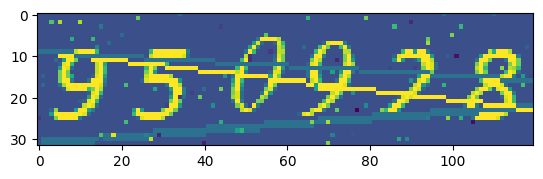

sample_ID:0, Label:950928.png, shape:(32, 120, 1)


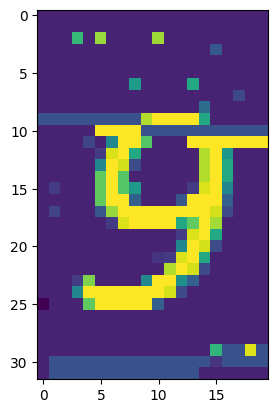

ID:0=(sample_ID:0, count:0), Label:9, shape:(32, 20, 1)


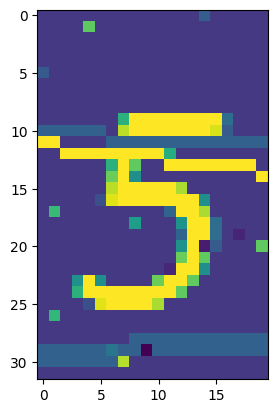

ID:1=(sample_ID:0, count:1), Label:5, shape:(32, 20, 1)


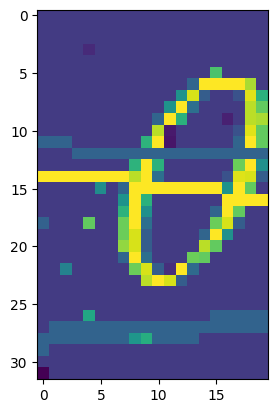

ID:2=(sample_ID:0, count:2), Label:0, shape:(32, 20, 1)


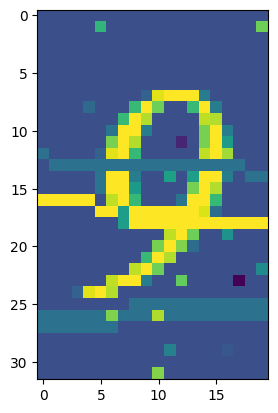

ID:3=(sample_ID:0, count:3), Label:9, shape:(32, 20, 1)


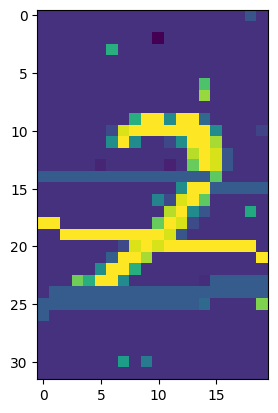

ID:4=(sample_ID:0, count:4), Label:2, shape:(32, 20, 1)


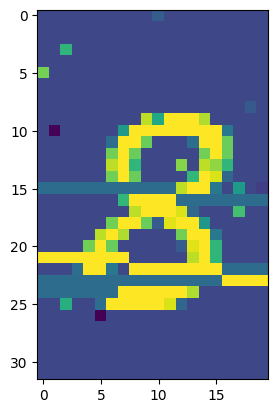

ID:5=(sample_ID:0, count:5), Label:8, shape:(32, 20, 1)
y_list= ['9', '5', '0', '9', '2', '8']
y_list= [[ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  1.00000000]
 [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  1.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
 [ 1.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
 [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  1.00000000]
 [ 0.00000000  0.00000000  1.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000]
 [ 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  1.00000000  0.00000000]]


In [6]:
# 初始化所需變數，以及將 numpy 設置只顯示至小數點下 9 位

np.set_printoptions(suppress=True, linewidth=150, precision=8, formatter={'float': '{: 0.8f}'.format})

epochs = 30     # 訓練的次數
img_rows = None   # 驗證碼影像檔的高
img_cols = None   # 驗證碼影像檔的寬
digits_in_img = 6  # 驗證碼影像檔中有幾位數
x_list = []     # 存所有驗證碼數字影像檔的array
y_list = []     # 存所有的驗證碼數字影像檔array代表的正確數字
x_train = []    # 存訓練用驗證碼數字影像檔的array
y_train = []    # 存訓練用驗證碼數字影像檔array代表的正確數字
x_test = []     # 存測試用驗證碼數字影像檔的array
y_test = []     # 存測試用驗證碼數字影像檔array代表的正確數字

# 將驗證碼 6 位數獨立切出的 funciton：驗證碼數字影像檔會存在 x_list，驗證碼數字影像檔代表的正確數字會存在 y_list
## 標準化資料：由於圖片點的值介於 0-255之間，因此可除以 255進行標準化。

def split_digits_in_img(img_filename, img_array, x_list, y_list):
    for i in range(digits_in_img):
        step = img_cols // digits_in_img
        x_list.append(img_array[:, i * step:(i + 1) * step] / 255)
        y_list.append(img_filename[i])

# 資料解壓縮：/content/image.zip -> /content/training + /content/testing
! unzip -o /content/image.zip > image_unzip.log

img_filenames = os.listdir('/content/training')

for img_filename in img_filenames:
    if '.png' not in img_filename:
        continue
    img = load_img('training/{0}'.format(img_filename), color_mode='grayscale')
    img_array = img_to_array(img)
    img_rows, img_cols, _ = img_array.shape
    split_digits_in_img(img_filename, img_array, x_list, y_list)

def show_training_image(sample_ID):
    img = load_img('training/{0}'.format(img_filenames[sample_ID]), color_mode='grayscale')
    img_array = img_to_array(img)
    plt.imshow(img)
    plt.show()
    print( "sample_ID:{}, Label:{}, shape:{}" .format(sample_ID, img_filenames[sample_ID], img_array.shape) )
    for i in range(6):
        ID = digits_in_img * sample_ID + i
        plt.imshow(x_list[ID])
        plt.show()
        print( "ID:{}=(sample_ID:{}, count:{}), Label:{}, shape:{}" .format(ID, sample_ID, i, y_list[ID], x_list[ID].shape) )

show_training_image(0)

print("y_list=", y_list[:6])

# 將 y_list 所存的驗證碼正確數字 0-9 轉成 categorical 形式
y_list = keras.utils.to_categorical(y_list, num_classes=10)

print("y_list=", y_list[:6])

# 將所有的資料拆成訓練用及測試用資料集
x_train, x_test, y_train, y_test = train_test_split(x_list, y_list, test_size=0.1, random_state=1)

In [7]:
# 建置繪圖函式
def show_train_history( train_history , train , validation , label ):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(label)
  plt.xlabel('Epoch')  # 不同回合的變化

  plt.legend( ['train','validation'] , loc = 'upper left' )
  plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D

In [9]:
# 建立model
#
# # 建立卷積層，Kernel size為3×3，使用32個filters，捲積後的圖形padding 與原圖尺寸相同。
# # 建立池化層，Pool size為數(2,2) 代表圖形的長與寬皆縮小為1/2。
# # 建立Dropout，捨棄一些神經元。
# # 建立平坦層，將來自上一層的資料轉為一維（即14 * 8 * 64 = 7164 個神經元，我們不需要指定，透過程式自動計算）。
# # 建立連結層（隱藏層），一個擁有128個神經元的全連接層。
# # 建立輸出層，我們的category數目為10，啟用函數為 softmax。

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_rows, img_cols//digits_in_img, 1)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

print('Created New Model')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 18, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 16, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 8, 64)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 8, 64)         0         
                                                                 
 flatten (Flatten)           (None, 7168)              0         
                                                                 
 dense (Dense)               (None, 128)               917632    
                                                        

Epoch 1/30
90/90 [==============================] - 3s 23ms/step - loss: 2.3075 - acc: 0.1111 - val_loss: 2.2668 - val_acc: 0.1000
Epoch 2/30
90/90 [==============================] - 2s 24ms/step - loss: 2.2460 - acc: 0.1759 - val_loss: 2.2288 - val_acc: 0.1667
Epoch 3/30
90/90 [==============================] - 3s 33ms/step - loss: 2.1498 - acc: 0.2833 - val_loss: 2.0790 - val_acc: 0.4000
Epoch 4/30
90/90 [==============================] - 2s 22ms/step - loss: 2.0229 - acc: 0.3370 - val_loss: 1.9012 - val_acc: 0.6333
Epoch 5/30
90/90 [==============================] - 2s 21ms/step - loss: 1.8157 - acc: 0.4407 - val_loss: 1.6694 - val_acc: 0.5500
Epoch 6/30
90/90 [==============================] - 2s 21ms/step - loss: 1.5986 - acc: 0.4833 - val_loss: 1.3761 - val_acc: 0.6500
Epoch 7/30
90/90 [==============================] - 2s 21ms/step - loss: 1.4106 - acc: 0.5704 - val_loss: 1.1837 - val_acc: 0.7000
Epoch 8/30
90/90 [==============================] - 2s 23ms/step - loss: 1.2035 - a

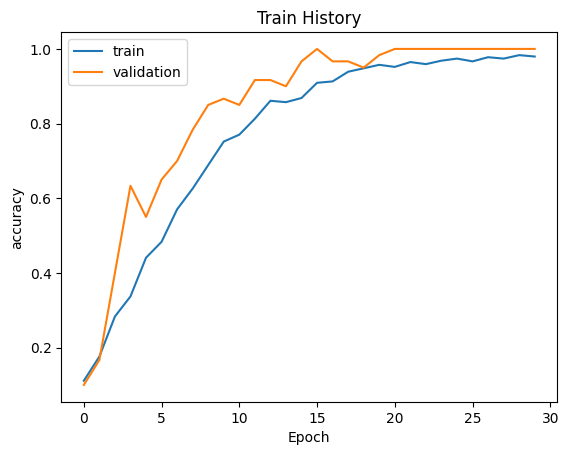

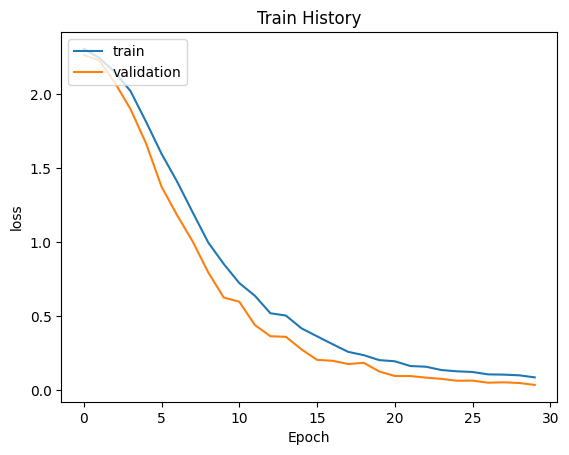

Test loss: 0.03670193627476692
Test accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# 參數調整

from keras import optimizers

# opt = optimizers.SGD(learning_rate = 0.0001)
opt = optimizers.Adam(learning_rate = 0.0001)

# model.compile(loss='mean_squared_error', optimizer = opt, metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['acc'])

# 開始訓練
train_history = model.fit( x = np.array(x_train), y = np.array(y_train), batch_size = digits_in_img, epochs = epochs, verbose = 1, validation_data = (np.array(x_test), np.array(y_test)), shuffle = True )

# 展示訓練過程
show_train_history(train_history, 'acc', 'val_acc', 'accuracy')
show_train_history(train_history, 'loss', 'val_loss', 'loss')

# 顯示訓練結果
loss, accuracy = model.evaluate(np.array(x_test), np.array(y_test), verbose = 0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# 以 HDF5格式 儲存模型：下次要使用模型時，可使用 from keras.models import load_model
model.save('CNN_(captcha_code).h5')


Model loaded from file.
Digit 1: Confidence => [ 0.00000309  0.00016892  0.99798942  0.00051141  0.00001374  0.00005041  0.00001120  0.00073809  0.00034377  0.00017000] Predict => 2
Digit 2: Confidence => [ 0.17453535  0.00008483  0.00026746  0.00033797  0.00112629  0.02726525  0.78878653  0.00000721  0.00217667  0.00541255] Predict => 6
Digit 3: Confidence => [ 0.00000125  0.00034402  0.00048883  0.00004201  0.00002984  0.00001036  0.00000094  0.99869353  0.00018411  0.00020502] Predict => 7
Digit 4: Confidence => [ 0.00057768  0.07282364  0.88933569  0.00154532  0.00070065  0.00421544  0.00124624  0.02840444  0.00000091  0.00114997] Predict => 2
Digit 5: Confidence => [ 0.00000044  0.00008226  0.98219162  0.00000748  0.00000015  0.00000945  0.00000001  0.01766695  0.00001379  0.00002786] Predict => 2
Digit 6: Confidence => [ 0.00000897  0.73695254  0.00017690  0.00291829  0.25689295  0.00175299  0.00012772  0.00082587  0.00007821  0.00026558] Predict => 1
Predicted varification code:

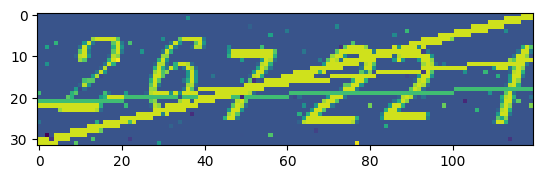

Plaintexts: 267221.png
Predicted varification code: [2, 6, 7, 2, 2, 1]


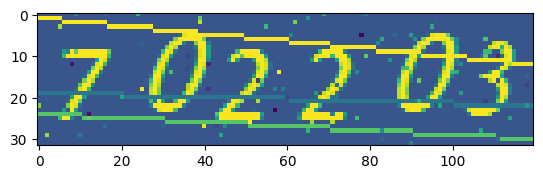

Plaintexts: 702203.png
Predicted varification code: [7, 0, 2, 2, 0, 3]


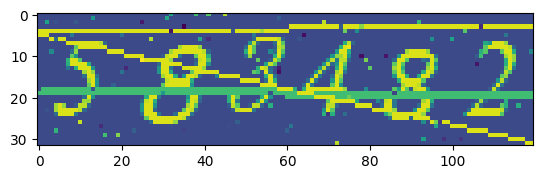

Plaintexts: 583482.png
Predicted varification code: [5, 8, 3, 4, 8, 2]


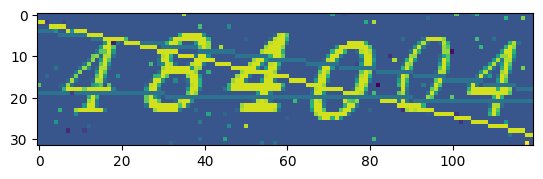

Plaintexts: 484004.png
Predicted varification code: [4, 8, 4, 0, 0, 4]


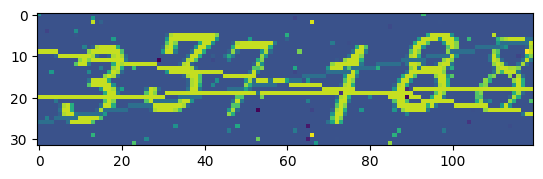

Plaintexts: 337188.png
Predicted varification code: [3, 3, 7, 1, 8, 8]


In [11]:
# 測試模型

if os.path.isfile('CNN_(captcha_code).h5'):
    model = models.load_model('CNN_(captcha_code).h5')
    print('Model loaded from file.')
else:
    print('No trained model found.')
    exit(-1)

def split_digits_in_img(img_array):
    x_list = list()
    for i in range(digits_in_img):
        step = img_cols // digits_in_img
        x_list.append(img_array[:, i * step:(i + 1) * step] / 255)
    return x_list

img_filenames = os.listdir('/content/testing')
captcha_codes = []
plaintexts = []
varification_codes = []

for img_filename in img_filenames:
    if '.png' not in img_filename:
        continue
    img = load_img('testing/{0}'.format(img_filename), color_mode='grayscale')
    img_array = img_to_array(img)
    img_rows, img_cols, _ = img_array.shape
    x_list = split_digits_in_img(img_array)
    captcha_codes.append(img_array)
    plaintexts.append(img_filename)

    varification_code = []
    for i in range(digits_in_img):
        confidences_degree = model.predict(np.array([x_list[i]]), verbose=0)
        result_class = np.argmax(confidences_degree, axis=1)
        varification_code.append(result_class[0])
        print('Digit {0}: Confidence => {1} Predict => {2}'.format(i + 1, np.squeeze(confidences_degree), np.squeeze(result_class)))
    varification_codes.append(varification_code)
    print('Predicted varification code:', varification_code)

for i in range(len(captcha_codes)):
    plt.imshow(captcha_codes[i])
    plt.show()
    print('Plaintexts:', plaintexts[i])
    print('Predicted varification code:', varification_codes[i])